<a href="https://colab.research.google.com/github/son50git/Routine-with-Python/blob/master/StackedBar_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def stackedBarCategories (rpt_name, roll_prd):

  from google.colab import drive, files
  drive.mount("/content/drive")
  uploaded = files.upload()

  sheets = ["RD Cats", "Hist Days of Week(non-Adj)"]

  for sheet in sheets:

    cats_df = pd.read_excel(rpt_name, sheet_name=sheet)  

    if sheet=="Hist Days of Week(non-Adj)":
      cats_df = cats_df[['ART','SLP','ORD','LES','TRA','Rel','Ref','PHA','SPC']]
    else:
      cats_df["ART"] = cats_df.ART.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["SLP"] = cats_df.SLP.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["ORD"] = cats_df.ORD.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["LES"] = cats_df.LES.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["TRA"] = cats_df.TRA.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["Rel"] = cats_df.Rel.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["Ref"] = cats_df.Ref.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["PHA"] = cats_df.PHA.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["SPC"] = cats_df.SPC.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df = cats_df.tail(21)

      cats_df.reset_index(inplace=True)
      cats_df.index = cats_df.index + 1

      cats_df2 = cats_df[['Date','Day','ORD','TRA','SPC','LES','SLP']]
      print()
      print(cats_df2.tail(7))

      cats_df1 = cats_df[['Date','Day','ART','Rel','Ref','PHA']]
      cats_df1["Pos_PCT"] = cats_df1.iloc[:, -4:-1].sum(axis=1) / 1440.00
      print()
      print(cats_df1.tail(7))

    tmp_2 = [i + j for i,j in zip(cats_df["ART"],cats_df["Rel"])]
    tmp_3 = [i + j for i,j in zip(tmp_2,cats_df["Ref"])]
    tmp_4 = [i + j for i,j in zip(tmp_3,cats_df["PHA"])]
    tmp_5 = [i + j for i,j in zip(tmp_4,cats_df["ORD"])]
    tmp_6 = [i + j for i,j in zip(tmp_5,cats_df["TRA"])]
    tmp_7 = [i + j for i,j in zip(tmp_6,cats_df["SPC"])]
    tmp_8 = [i + j for i,j in zip(tmp_7,cats_df["LES"])]

    f, ax = plt.subplots(1, figsize=(12,5))
    bar_l = [i+1 for i in range(len(cats_df['ART']))]
    ax.bar(bar_l, cats_df["ART"], label="ART", color="olive")
    ax.bar(bar_l, cats_df["Rel"], label="Rel", color="purple", bottom=cats_df["ART"])
    ax.bar(bar_l, cats_df["Ref"], label="Ref", color="pink", bottom=tmp_2)
    ax.bar(bar_l, cats_df["PHA"], label="PHA", color="cyan", bottom=tmp_3)
    ax.bar(bar_l, cats_df["ORD"], label="ORD", color="brown", bottom=tmp_4)
    ax.bar(bar_l, cats_df["TRA"], label="TRA", color="gray", bottom=tmp_5)
    ax.bar(bar_l, cats_df["SPC"], label="SPC", color="black", bottom=tmp_6)
    ax.bar(bar_l, cats_df["LES"], label="LES", color="red", bottom=tmp_7)
    ax.bar(bar_l, cats_df["SLP"], label="SLP", color="blue", bottom=tmp_8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
    print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201125_0110.xlsx to Routine_rpts_20201125_0110 (20).xlsx

          Date  Day    ORD   TRA   SPC    LES    SLP
15  11/18/2020  WED  307.0  60.0  36.0  326.0  221.0
16  11/19/2020  THU  290.0  38.0  50.0  354.0  315.0
17  11/20/2020  FRI  360.0  92.0   3.0  112.0  443.0
18  11/21/2020  SAT  449.0   0.0   0.0   94.0  272.0
19  11/22/2020  SUN  249.0  33.0   0.0  106.0  433.0
20  11/23/2020  MON  321.0   0.0  42.0   48.0  406.0
21  11/24/2020  TUE  346.0  75.0  22.0   27.0  418.0

          Date  Day    ART    Rel   Ref   PHA   Pos_PCT
15  11/18/2020  WED  400.0    1.0  16.0  73.0  0.289583
16  11/19/2020  THU  312.0   39.0  19.0  23.0  0.256944
17  11/20/2020  FRI  317.0   31.0  52.0  30.0  0.277778
18  11/21/2020  SAT  583.0   36.0   6.0   0.0  0.434028
19  11/22/2020  SUN  308.0  124.0  97.0  90.0  0.367361
20  11/23/2020  MON  522.0   48.0  34.0  19.0  0.419444
21  11/24/2020  TUE  316.0  120.0  41.0  75.0  0.331250



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


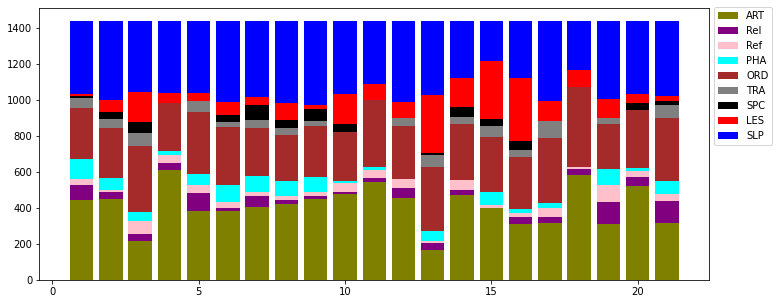

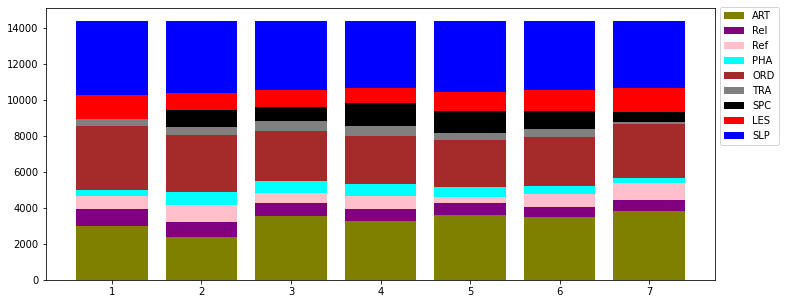

In [42]:
rpt_name ="Routine_rpts_20201125_0110.xlsx"
stackedBarCategories(rpt_name, 1)